# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

## <font color='brown'>Handling Excel File</font>
>  
- 엑셀파일 읽고 쓰기
- 엑셀파일 통합
- 엑셀데이터 핸들링
- <b><font color='FFAAAA'>엑셀데이터 시각화</font></b>

<hr>

### <font color='#CC0000'>엑셀데이터 시각화</font>

In [1]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']        = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

#### <font color='#0000CC'>엑셀 파일에 그래프 삽입</font>

In [2]:
import matplotlib

matplotlib.rcParams['font.family']        = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
sales = {'시간' : [  9, 10, 11, 12, 13, 14, 15 ],
         '제품1': [ 10, 15, 12, 11, 12, 14, 13 ],
         '제품2': [  9, 11, 14, 12, 13, 10, 12 ]
}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df

,제품1,제품2
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


In [4]:
#index 라벨 추가
df.index.name = '시간' 
df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


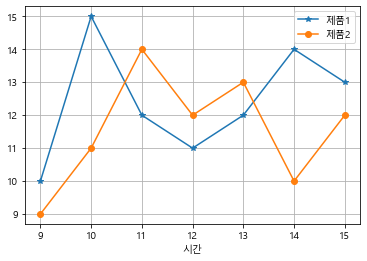

In [5]:
# product_plot = df.plot(grid = True, style = ['-*', '-o'], title='시간대별 생산량')
product_plot = df.plot(grid = True, style = ['-*', '-o'])
product_plot;

Text(0, 0.5, '생산량')

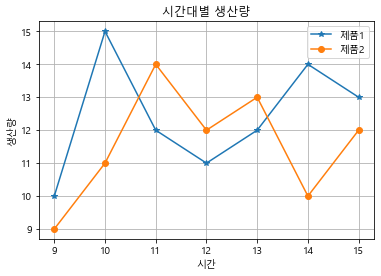

In [6]:
product_plot = df.plot(grid = True, style = ['-*', '-o'])
product_plot.set_title('시간대별 생산량')
product_plot.set_ylabel("생산량")


In [7]:
!mkdir figures

하위 디렉터리 또는 파일 figures이(가) 이미 있습니다.


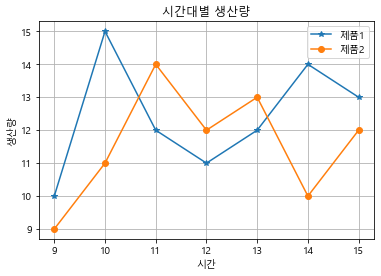

In [8]:
product_plot = df.plot(grid = True, style = ['-*', '-o'])
product_plot.set_title('시간대별 생산량')
product_plot.set_ylabel("생산량")

fig_file = './figures/fig_for_excel1.png'  # 이미지 파일 경로 및 이름
plt.savefig(fig_file, dpi = 400)           # 그래프를 이미지 파일로 저장

plt.show()

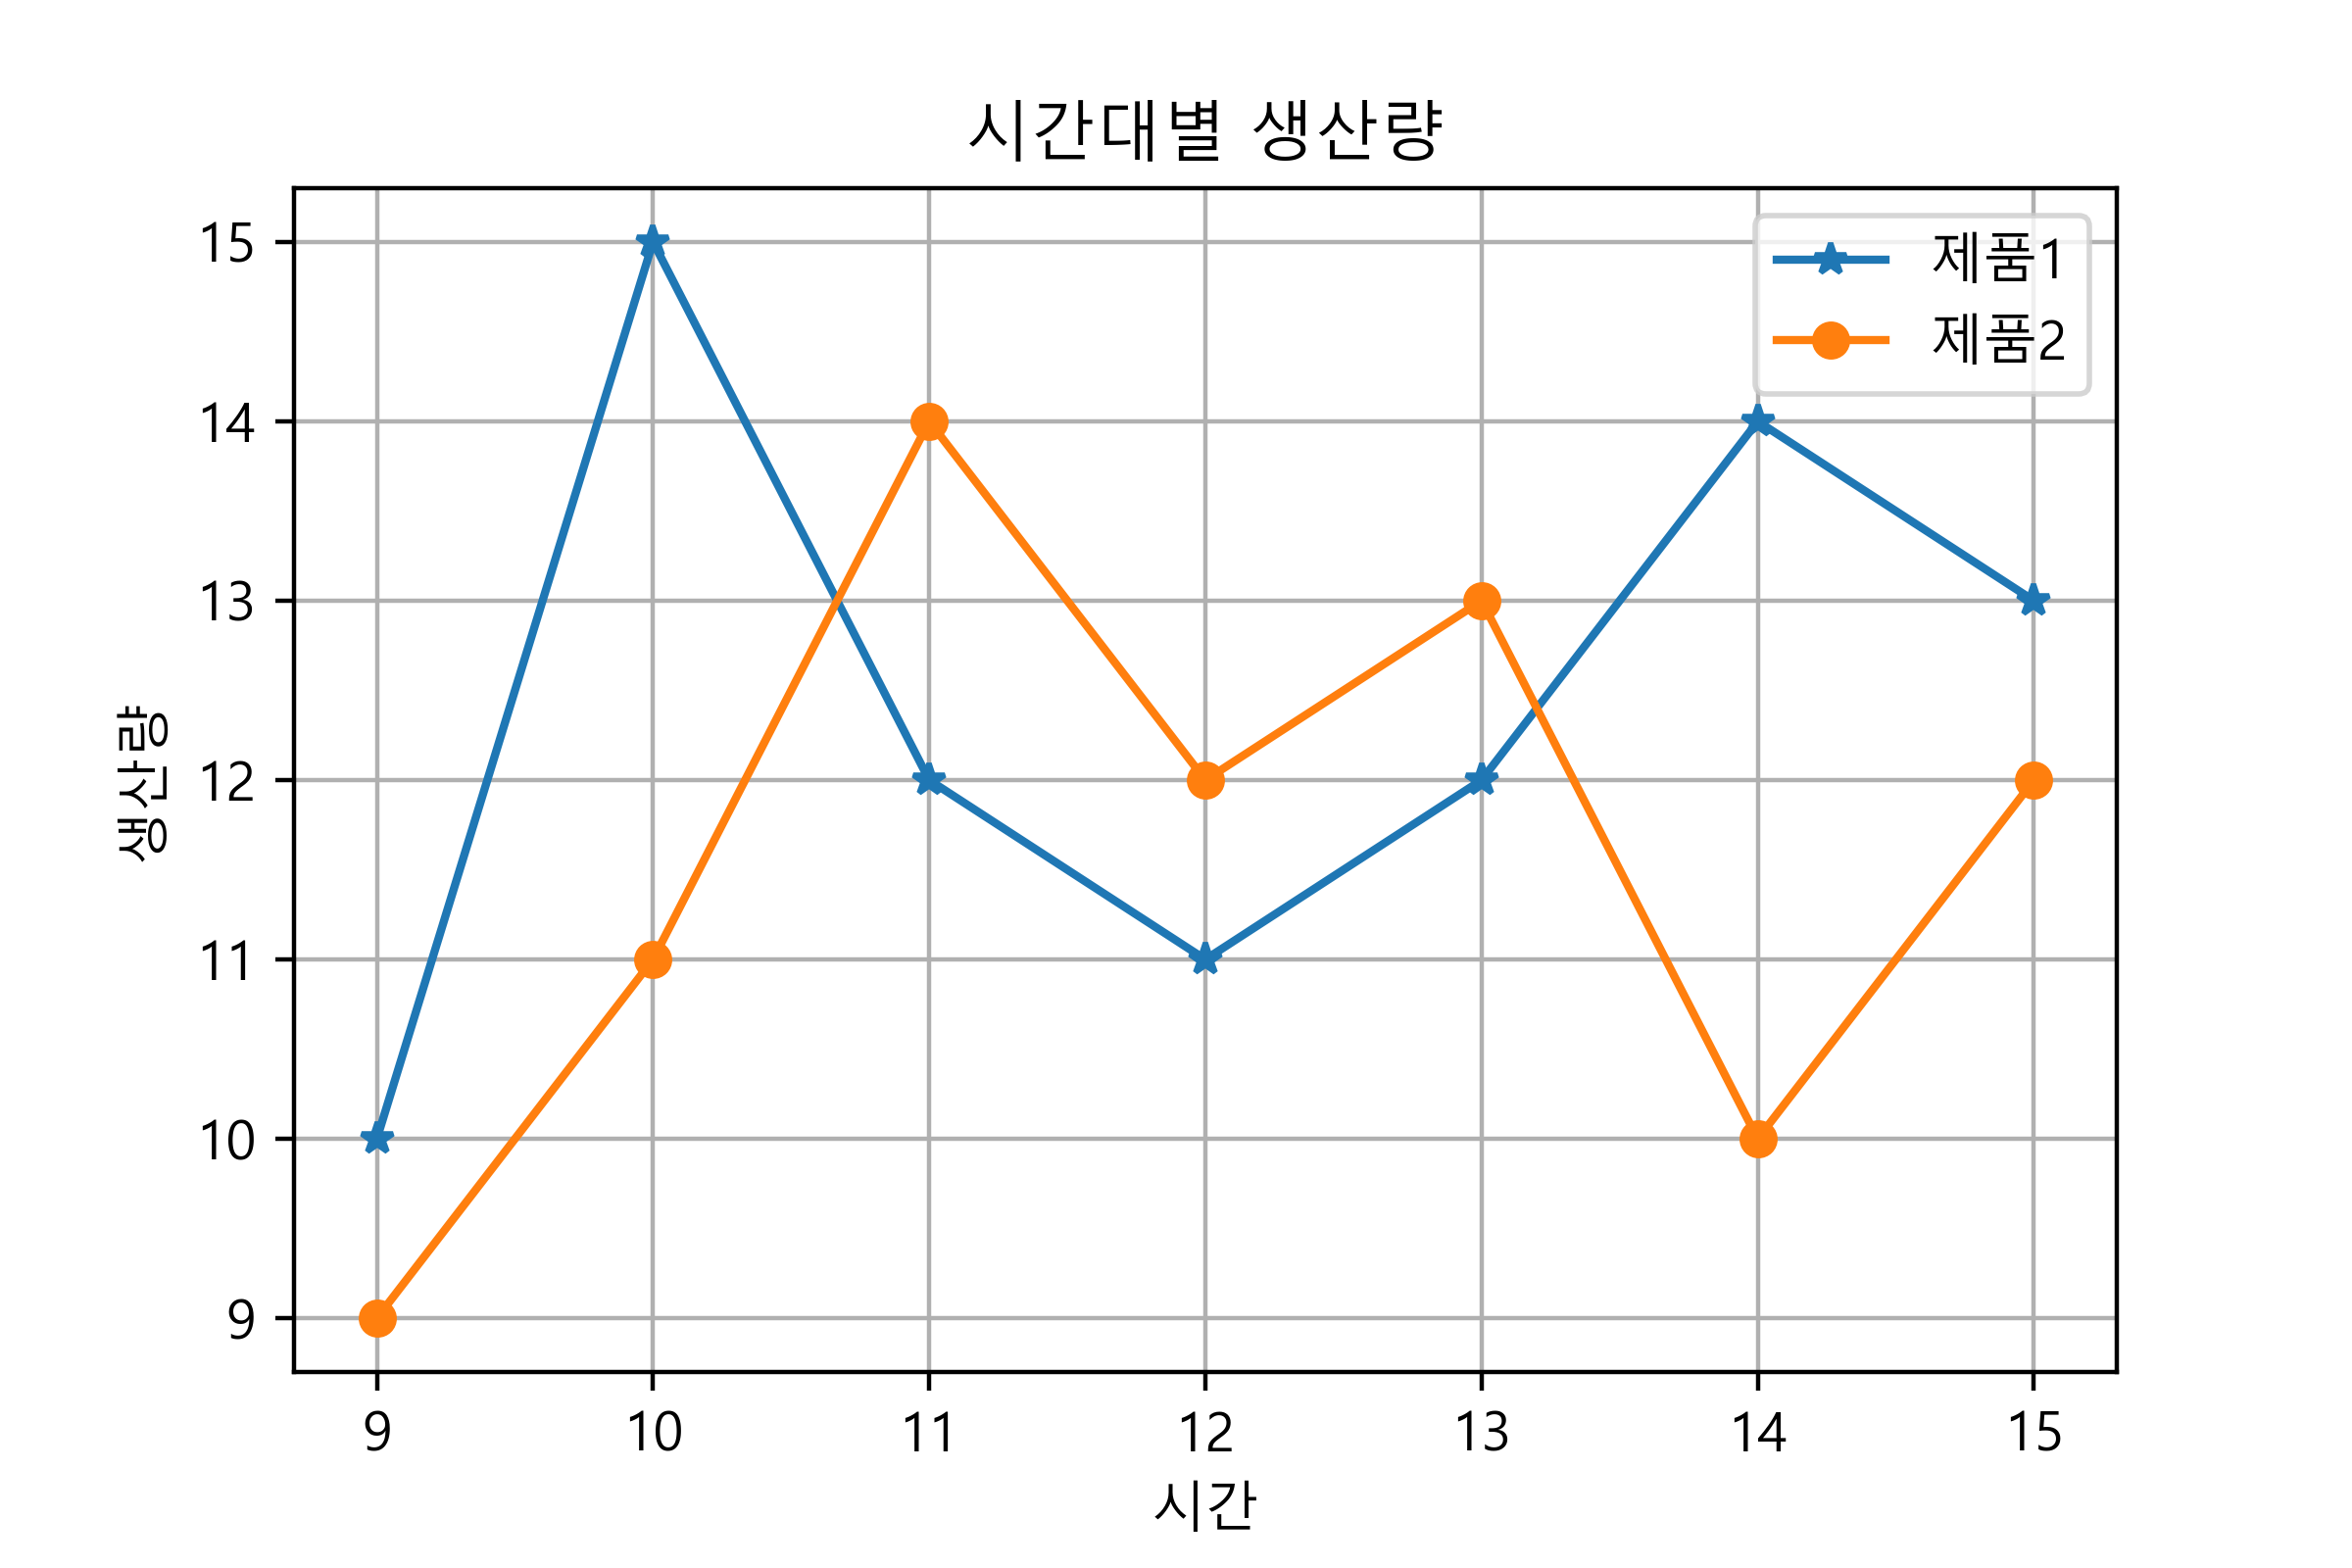

In [9]:
Image(fig_file)

#### <font color='#0000CC'>엑셀 이미지 추가</font>

In [10]:
# (1) pandas의 ExcelWriter 객체 생성
excel_file   = './data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크시트(worksheet) 객체 생성
worksheet = excel_writer.sheets['Sheet1']

# (4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', fig_file, {'x_scale': 0.7, 'y_scale': 0.7})
# worksheet.insert_image(1, 3, fig_file, {'x_scale': 0.7, 'y_scale': 0.7})

# (5) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

In [11]:
# !dir data\*.xlsx

<font color='#0000FF'>★ data/data_image_to_excel.xlsx :  <a href='./data/data_image_to_excel.xlsx'>[파일 확인]</a></font>

#### <font color='#0000CC'>엑셀 차트 생성</font>

In [12]:
# (1) pandas의 ExcelWriter 객체 생성
excel_file  = './data/data_chart_in_excel.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정 
chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

In [13]:
# !dir data\*.xlsx

<font color='#0000FF'>★ data/data_chart_in_excel.xlsx :  <a href='./data/data_chart_in_excel.xlsx'>[파일 확인]</a></font>

#### <font color='#00CC00'>차트 생성을 위한 데이터값의 범위 지정</font>

In [14]:
chart.add_series({'values'    : '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name'      : '=Sheet1!$B$1',})

chart.add_series({'values'    : '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name'      : '=Sheet1!$C$1',})

#### <font color='#00CC00'>엑셀 차트에 제목과 x,y축 라벨 추가</font>

In [15]:
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

#### <font color='#00CC00'>Final 엑셀 차트</font>

In [16]:
# (1) pandas의 ExcelWriter 객체 생성
excel_file2 = './data/data_chart_in_excel2.xlsx'
excel_chart = pd.ExcelWriter(excel_file2, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성 (원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values'    : '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name'      : '=Sheet1!$B$1',})

chart.add_series({'values'    : '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name'      : '=Sheet1!$C$1',})

# (5-1) 엑셀 차트에 x, y축 라벨과 제목 추가
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7)  ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

In [17]:
# !dir data\*.xlsx

<font color='#0000FF'>★ data/data_chart_in_excel2.xlsx :  <a href='./data/data_chart_in_excel2.xlsx'>[파일 확인]</a></font>

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>